# Projeto Etapa 2

Aluno - José Carlos de Almeida Filho

# Segmentação das Imagens

### Bibliotecas

In [71]:
import cv2
from PIL import Image
from numpy import *
from pylab import *
import pandas
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import os
import imFerramentas as imF

### Testes de Imagens

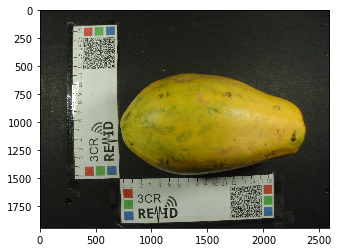

In [170]:
# lendo imagem com PIL
image =  mpimg.imread("mamaocompleto_normal/EM3_D1_L1.JPG")
#image =  mpimg.imread("mamaocompleto_normal/EM2_D7_L1.JPG")
#image =  mpimg.imread("mamaocompleto/EM1_D1'_L1.JPG")

plt.imshow(image)

## Escala da Imagem

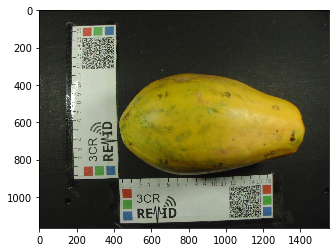

In [124]:
# Diminuindo a resolução para acelerar o processamento

# criando escala para nova resolucao
escala = 60 # percentual da imagem original
comprimento = int(image.shape[1] * escala / 100)
altura = int(image.shape[0] * escala / 100)
dim = (comprimento, altura)

# ajustar resolução
image_ori = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
image = image_ori    
    
    
#exibindo imagem
plt.imshow(image)

# Pipeline para EM2 e EM3

(array([4.36600e+03, 4.88149e+05, 5.39603e+05, 1.04112e+05, 2.87430e+04,
        1.97320e+04, 1.78870e+04, 1.57800e+04, 2.30570e+04, 3.03110e+04,
        3.83920e+04, 5.18040e+04, 7.32120e+04, 6.51150e+04, 4.98690e+04,
        4.18880e+04, 7.94760e+04, 8.13850e+04, 2.21590e+04, 2.08330e+04,
        7.51300e+03, 3.77000e+02, 3.40000e+02, 3.00000e+02, 3.65000e+02,
        4.32000e+02, 5.86000e+02, 8.81000e+02, 1.43800e+03, 1.47200e+03,
        1.28900e+03, 2.26400e+03]),
 array([  3.   ,  10.875,  18.75 ,  26.625,  34.5  ,  42.375,  50.25 ,
         58.125,  66.   ,  73.875,  81.75 ,  89.625,  97.5  , 105.375,
        113.25 , 121.125, 129.   , 136.875, 144.75 , 152.625, 160.5  ,
        168.375, 176.25 , 184.125, 192.   , 199.875, 207.75 , 215.625,
        223.5  , 231.375, 239.25 , 247.125, 255.   ]),
 <a list of 32 Patch objects>)

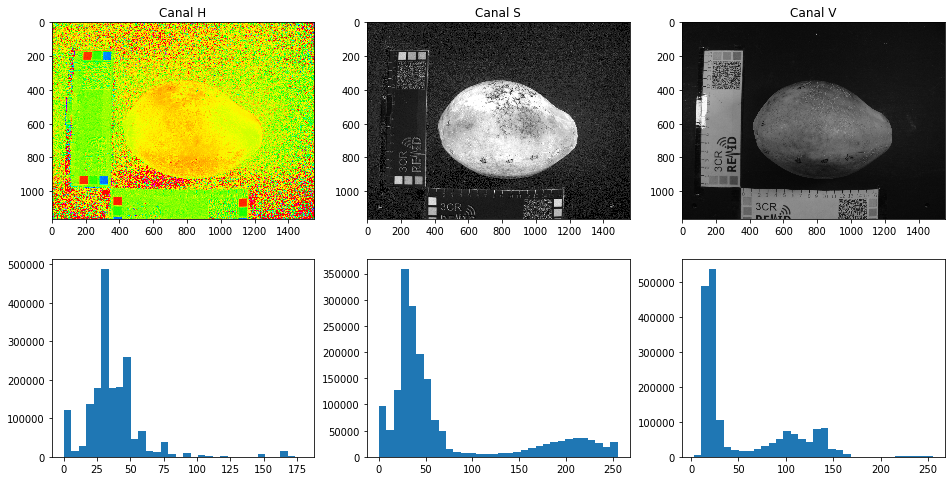

In [93]:
#HSV
image = cv2.cvtColor(image_ori, cv2.COLOR_RGB2HSV)

fig = plt.figure(figsize=(16, 8))
a = fig.add_subplot(2, 3, 1)
imgplot = plt.imshow(image[:,:,0],cmap="hsv")

a.set_title('Canal H')

b = fig.add_subplot(2, 3, 2)
imgplot = plt.imshow(image[:,:,1],cmap="gray")
b.set_title('Canal S')

c = fig.add_subplot(2, 3, 3)
imgplot = plt.imshow(image[:,:,2],cmap="gray")
c.set_title('Canal V')

a = fig.add_subplot(2, 3, 4)
hist(image[:,:,0].flatten(), 32)

b = fig.add_subplot(2, 3, 5)
hist(image[:,:,1].flatten(), 32)

c = fig.add_subplot(2, 3, 6)
hist(image[:,:,2].flatten(), 32)

## Escolhendo a Limiarizacao

D:\Desenvolvimento\Anaconda\lib\site-packages\ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, 'Canal S Limiarizado (140-260)')

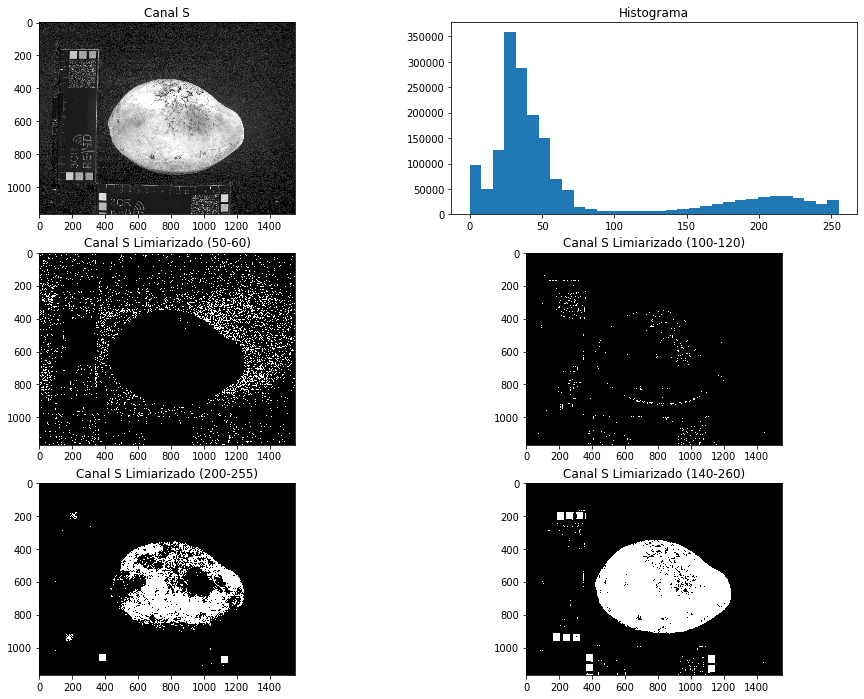

In [119]:
# Escolhendo o canal com mais contraste
canal_S = image[:,:,1]

fig = plt.figure(figsize=(16, 12))
a = fig.add_subplot(3, 2, 1)
imgplot = plt.imshow(canal_S,cmap="gray")
a.set_title('Canal S')

b = fig.add_subplot(3, 2, 2)
hist(canal_S.flatten(), 32)
b.set_title('Histograma')

b = fig.add_subplot(3, 2, 3)
canal_S_lim = imF.limiarizacao_janela(canal_S, 50,60)
imgplot = plt.imshow(canal_S_lim,cmap="gray")
b.set_title('Canal S Limiarizado (50-60)')

b = fig.add_subplot(3, 2, 4)
canal_S_lim = imF.limiarizacao_janela(canal_S, 100,120) 
imgplot = plt.imshow(canal_S_lim,cmap="gray")
b.set_title('Canal S Limiarizado (100-120)')


b = fig.add_subplot(3, 2, 5)
canal_S_lim = imF.limiarizacao_janela(canal_S, 200,255) 
imgplot = plt.imshow(canal_S_lim,cmap="gray")
b.set_title('Canal S Limiarizado (200-255)')


b = fig.add_subplot(3, 2, 6)
canal_S_lim = imF.limiarizacao_janela(canal_S, 110,220) 
imgplot = plt.imshow(canal_S_lim,cmap="gray")
b.set_title('Canal S Limiarizado (110-220)')

b = fig.add_subplot(3, 2, 6)
canal_S_lim = imF.limiarizacao_janela(canal_S, 140,260) 
imgplot = plt.imshow(canal_S_lim,cmap="gray")
b.set_title('Canal S Limiarizado (140-260)')

<p><b>Analisando os plots acima, a limiarização mais adequada é o valor de 140 a 260 por que com estes valores é possível visualizar o mamão no seu formato original mais próximo.</b></p>

## Aplicando Median Blur

Text(0.5, 1.0, 'Filtro de 43x43')

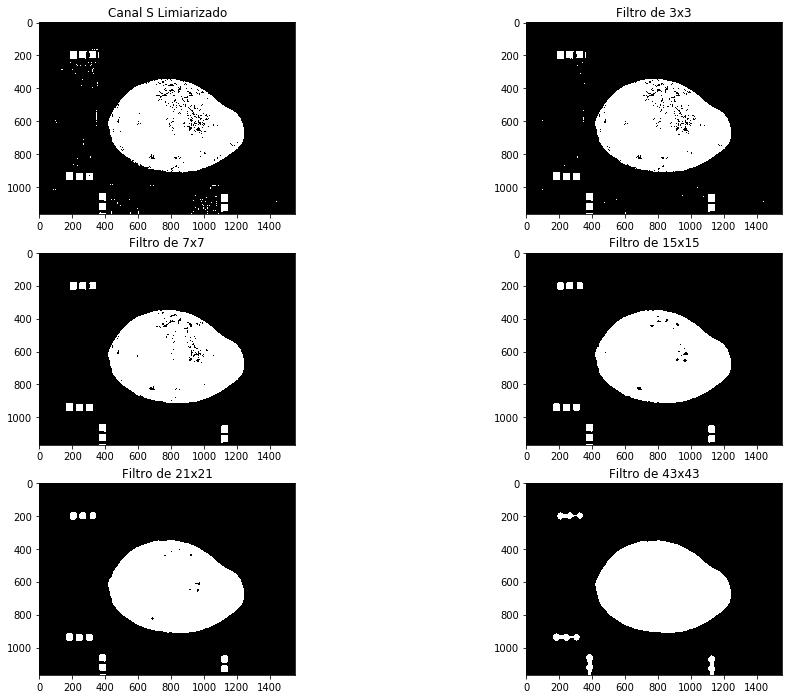

In [107]:
fig = plt.figure(figsize=(16, 12))
a = fig.add_subplot(3, 2, 1)
canal_S_lim = imF.limiarizacao_janela(canal_S, 140,260) 
imgplot = plt.imshow(canal_S_lim,cmap="gray")
a.set_title('Canal S Limiarizado')

b = fig.add_subplot(3, 2, 2)
canal_S_lim_blur =cv2.medianBlur(canal_S_lim, 3)
imgplot = plt.imshow(canal_S_lim_blur,cmap="gray")
b.set_title('Filtro de 3x3')

b = fig.add_subplot(3, 2, 3)
canal_S_lim_blur =cv2.medianBlur(canal_S_lim, 7)
imgplot = plt.imshow(canal_S_lim_blur,cmap="gray")
b.set_title('Filtro de 7x7')

b = fig.add_subplot(3, 2, 4)
canal_S_lim_blur =cv2.medianBlur(canal_S_lim, 15)
imgplot = plt.imshow(canal_S_lim_blur,cmap="gray")
b.set_title('Filtro de 15x15')


b = fig.add_subplot(3, 2, 5)
canal_S_lim_blur_21 =cv2.medianBlur(canal_S_lim, 21)
imgplot = plt.imshow(canal_S_lim_blur_21,cmap="gray")
b.set_title('Filtro de 21x21')

b = fig.add_subplot(3, 2, 6)
canal_S_lim_blur =cv2.medianBlur(canal_S_lim, 35)
imgplot = plt.imshow(canal_S_lim_blur,cmap="gray")
b.set_title('Filtro de 35x35')

## Exemplo de Filtro 31x31 com Máscara

Text(0.5, 1.0, 'Imagem com aplicação de Máscara')

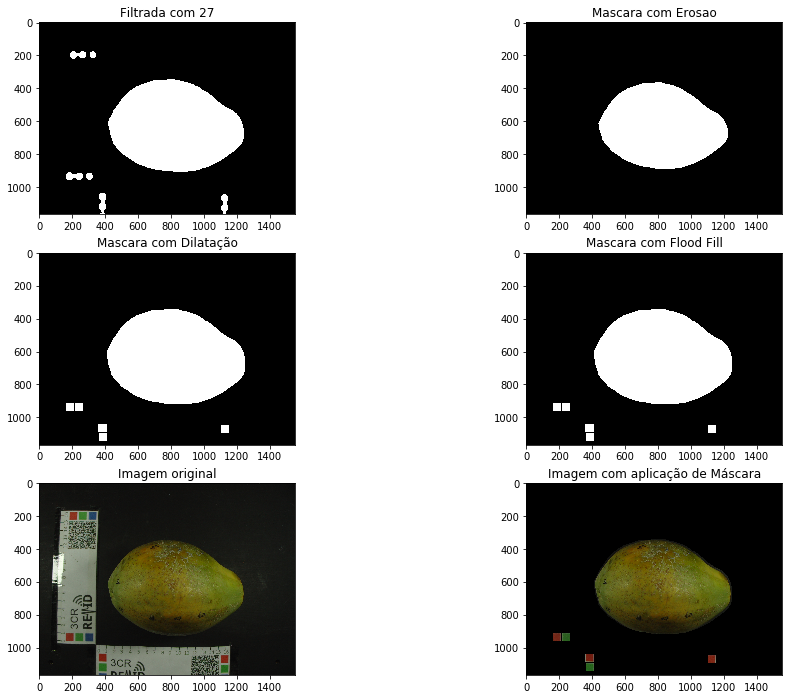

In [116]:
canal_S_lim_blur =cv2.medianBlur(canal_S_lim, 31)

element = cv2.getStructuringElement(cv2.MORPH_RECT, (17,17))


fig = plt.figure(figsize=(16, 12))

#Imagem Filtrada
a = fig.add_subplot(3, 2, 1)
imgplot = plt.imshow(canal_S_lim_blur,cmap="gray")
a.set_title('Filtrada com 27')

#Imagem com aplicação de erosão, iterando duas vezes
b = fig.add_subplot(3, 2, 2)
canal_s_mask = cv2.erode(canal_S_lim_blur, element, iterations = 2)
imgplot = plt.imshow(canal_s_mask,cmap="gray")
b.set_title('Mascara com Erosao')

#Imagem com aplicação de dilatação, iterando quatro vezes
b = fig.add_subplot(3, 2, 3)
canal_s_mask = cv2.dilate(canal_s_mask, element, iterations = 3)
imgplot = plt.imshow(canal_s_mask,cmap="gray")
b.set_title('Mascara com Dilatação')

#criando uma "imagem" para o flood fill, algoritmo para "tapar buracos"
h, w = canal_s_mask.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
im_floodfill = canal_s_mask.copy()

#Aplicando o flood fill
b = fig.add_subplot(3, 2, 4)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
im_floodfill_inv = cv2.bitwise_not(im_floodfill) #bitwise
canal_s_mask = canal_s_mask | im_floodfill_inv

imgplot = plt.imshow(canal_s_mask,cmap="gray")
b.set_title('Mascara com Flood Fill')



b = fig.add_subplot(3, 2, 5)
plt.imshow(image_ori)
b.set_title('Imagem original')

b = fig.add_subplot(3, 2, 6)
final = cv2.bitwise_and(image_ori,image_ori,mask=canal_s_mask)
imgplot = plt.imshow(final,cmap="gray")
b.set_title('Imagem com aplicação de Máscara')

## Exemplo de Filtro 37x37 com Máscara

Text(0.5, 1.0, 'Imagem com aplicação de Máscara')

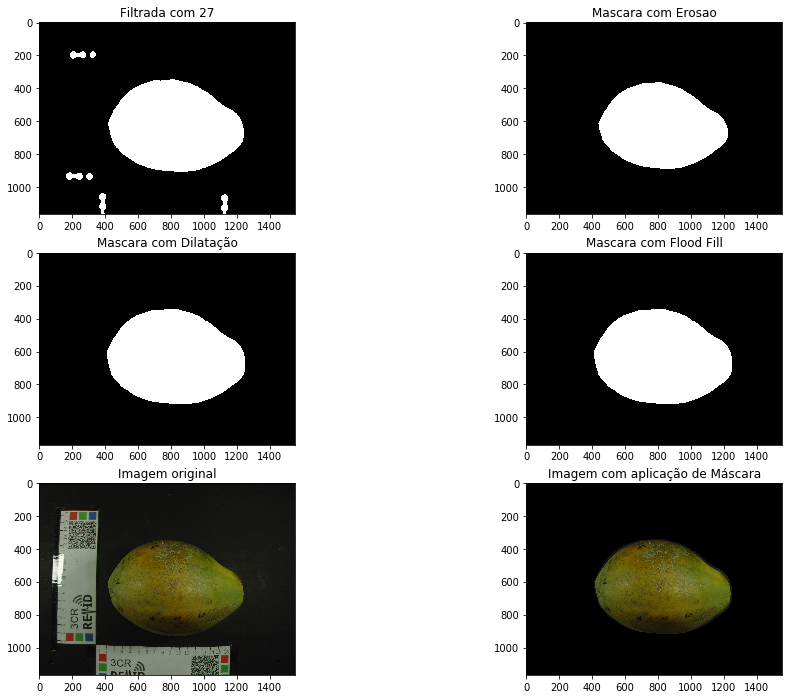

In [117]:
canal_S_lim_blur =cv2.medianBlur(canal_S_lim, 35)

element = cv2.getStructuringElement(cv2.MORPH_RECT, (17,17))


fig = plt.figure(figsize=(16, 12))

#Imagem Filtrada
a = fig.add_subplot(3, 2, 1)
imgplot = plt.imshow(canal_S_lim_blur,cmap="gray")
a.set_title('Filtrada com 27')

#Imagem com aplicação de erosão, iterando duas vezes
b = fig.add_subplot(3, 2, 2)
canal_s_mask = cv2.erode(canal_S_lim_blur, element, iterations = 2)
imgplot = plt.imshow(canal_s_mask,cmap="gray")
b.set_title('Mascara com Erosao')

#Imagem com aplicação de dilatação, iterando quatro vezes
b = fig.add_subplot(3, 2, 3)
canal_s_mask = cv2.dilate(canal_s_mask, element, iterations = 3)
imgplot = plt.imshow(canal_s_mask,cmap="gray")
b.set_title('Mascara com Dilatação')

#criando uma "imagem" para o flood fill, algoritmo para "tapar buracos"
h, w = canal_s_mask.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
im_floodfill = canal_s_mask.copy()

#Aplicando o flood fill
b = fig.add_subplot(3, 2, 4)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
im_floodfill_inv = cv2.bitwise_not(im_floodfill) #bitwise
canal_s_mask = canal_s_mask | im_floodfill_inv

imgplot = plt.imshow(canal_s_mask,cmap="gray")
b.set_title('Mascara com Flood Fill')



b = fig.add_subplot(3, 2, 5)
plt.imshow(image_ori)
b.set_title('Imagem original')

b = fig.add_subplot(3, 2, 6)
final = cv2.bitwise_and(image_ori,image_ori,mask=canal_s_mask)
imgplot = plt.imshow(final,cmap="gray")
b.set_title('Imagem com aplicação de Máscara')

<p><b>Visualizando os plots acima, o filtro adequado é (37x37), pois com filtro abaixos destes, na imagem final é possível ver os parâmetros de medidas .</b></p>

# Pipeline para EM1

(array([  5112.,  34755., 232484., 290630., 235012., 120419.,  85206.,
         32910.,  16695.,  14444.,  11597.,  12695.,  14061.,  17387.,
         20210.,  23197.,  33818.,  43710.,  56500.,  61056.,  76226.,
         79656.,  87113.,  54185.,  43674.,  46807.,  36060.,  18649.,
          5866.,    431.,    376.,   2189.]),
 array([  5.    ,  12.8125,  20.625 ,  28.4375,  36.25  ,  44.0625,
         51.875 ,  59.6875,  67.5   ,  75.3125,  83.125 ,  90.9375,
         98.75  , 106.5625, 114.375 , 122.1875, 130.    , 137.8125,
        145.625 , 153.4375, 161.25  , 169.0625, 176.875 , 184.6875,
        192.5   , 200.3125, 208.125 , 215.9375, 223.75  , 231.5625,
        239.375 , 247.1875, 255.    ]),
 <a list of 32 Patch objects>)

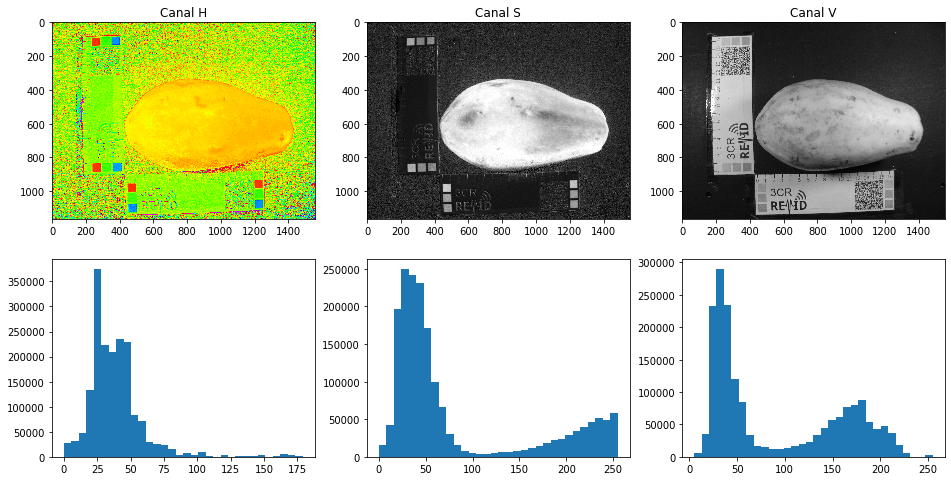

In [125]:
#HSV
image = cv2.cvtColor(image_ori, cv2.COLOR_RGB2HSV)

fig = plt.figure(figsize=(16, 8))
a = fig.add_subplot(2, 3, 1)
imgplot = plt.imshow(image[:,:,0],cmap="hsv")
a.set_title('Canal H')

b = fig.add_subplot(2, 3, 2)
imgplot = plt.imshow(image[:,:,1],cmap="gray")
b.set_title('Canal S')

c = fig.add_subplot(2, 3, 3)
imgplot = plt.imshow(image[:,:,2],cmap="gray")
c.set_title('Canal V')

a = fig.add_subplot(2, 3, 4)
hist(image[:,:,0].flatten(), 32)

b = fig.add_subplot(2, 3, 5)
hist(image[:,:,1].flatten(), 32)

c = fig.add_subplot(2, 3, 6)
hist(image[:,:,2].flatten(), 32)

## Escolhendo a Limiarizacao

Text(0.5, 1.0, 'Canal S Limiarizado (110-220)')

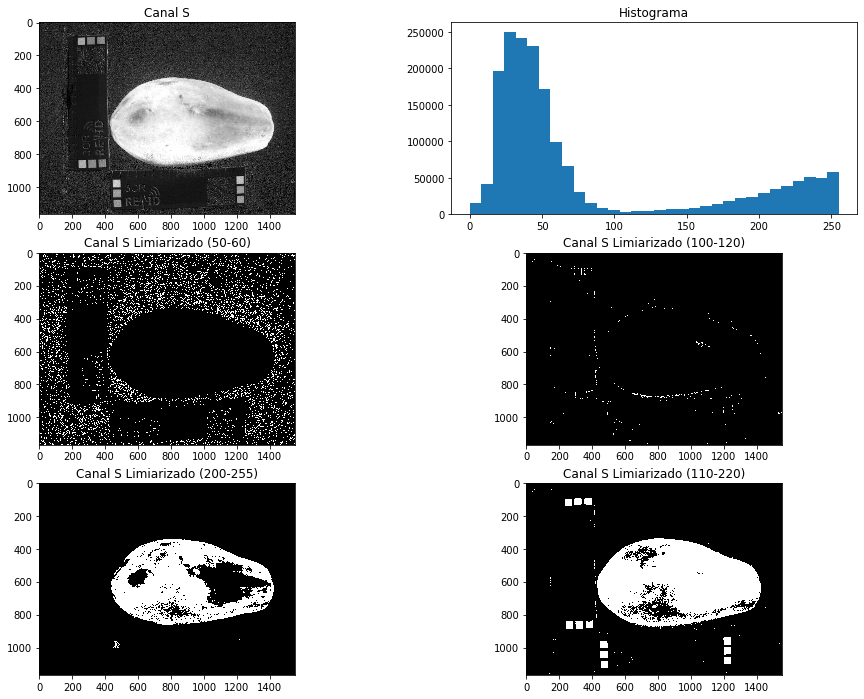

In [127]:
#escolhendo o canal com mais contraste
canal_S = image[:,:,1]

fig = plt.figure(figsize=(16, 12))
a = fig.add_subplot(3, 2, 1)
imgplot = plt.imshow(canal_S,cmap="gray")
a.set_title('Canal S')

b = fig.add_subplot(3, 2, 2)
hist(canal_S.flatten(), 32)
b.set_title('Histograma')

b = fig.add_subplot(3, 2, 3)
canal_S_lim = imF.limiarizacao_janela(canal_S, 50,60)
imgplot = plt.imshow(canal_S_lim,cmap="gray")
b.set_title('Canal S Limiarizado (50-60)')

b = fig.add_subplot(3, 2, 4)
canal_S_lim = imF.limiarizacao_janela(canal_S, 100,120) 
imgplot = plt.imshow(canal_S_lim,cmap="gray")
b.set_title('Canal S Limiarizado (100-120)')


b = fig.add_subplot(3, 2, 5)
canal_S_lim = imF.limiarizacao_janela(canal_S, 200,255) 
imgplot = plt.imshow(canal_S_lim,cmap="gray")
b.set_title('Canal S Limiarizado (200-255)')


b = fig.add_subplot(3, 2, 6)
canal_S_lim = imF.limiarizacao_janela(canal_S, 110,250) 
imgplot = plt.imshow(canal_S_lim,cmap="gray")
b.set_title('Canal S Limiarizado (110-250)')

<p><b>Analisando os plots acima, a limiarização mais adequada é o valor de 110 a 250 por que com estes valores é possível visualizar o mamão no seu formato original mais próximo.</b></p>

## Aplicando Median Blur

Text(0.5, 1.0, 'Filtro de 39x39')

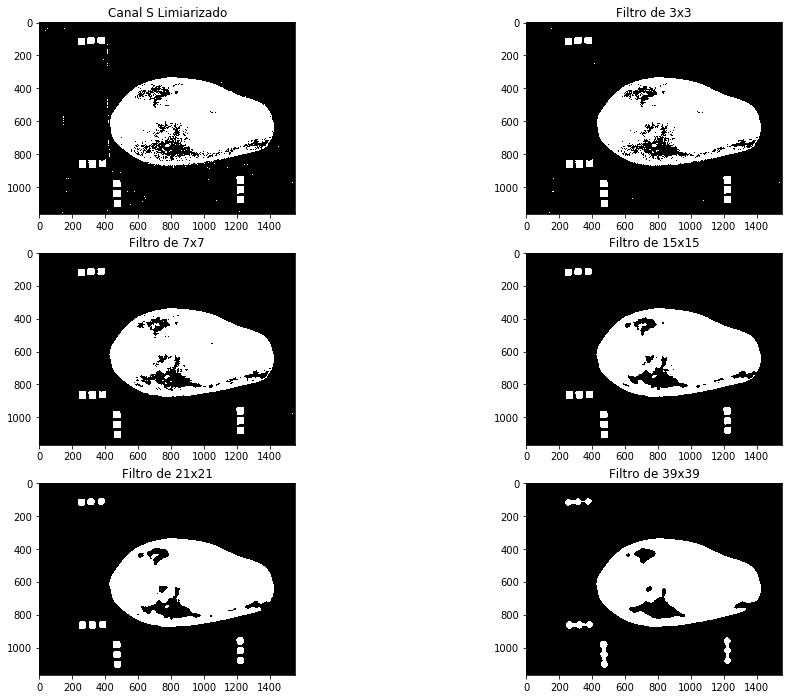

In [171]:
# Filtrando

fig = plt.figure(figsize=(16, 12))
a = fig.add_subplot(3, 2, 1)
canal_S_lim = imF.limiarizacao_janela(canal_S, 110,250) 
imgplot = plt.imshow(canal_S_lim,cmap="gray")
a.set_title('Canal S Limiarizado')

b = fig.add_subplot(3, 2, 2)
canal_S_lim_blur =cv2.medianBlur(canal_S_lim, 3)
imgplot = plt.imshow(canal_S_lim_blur,cmap="gray")
b.set_title('Filtro de 3x3')

b = fig.add_subplot(3, 2, 3)
canal_S_lim_blur =cv2.medianBlur(canal_S_lim, 7)
imgplot = plt.imshow(canal_S_lim_blur,cmap="gray")
b.set_title('Filtro de 7x7')

b = fig.add_subplot(3, 2, 4)
canal_S_lim_blur =cv2.medianBlur(canal_S_lim, 15)
imgplot = plt.imshow(canal_S_lim_blur,cmap="gray")
b.set_title('Filtro de 15x15')


b = fig.add_subplot(3, 2, 5)
canal_S_lim_blur =cv2.medianBlur(canal_S_lim, 21)
imgplot = plt.imshow(canal_S_lim_blur,cmap="gray")
b.set_title('Filtro de 21x21')


b = fig.add_subplot(3, 2, 6)
canal_S_lim_blur =cv2.medianBlur(canal_S_lim, 39)
imgplot = plt.imshow(canal_S_lim_blur,cmap="gray")
b.set_title('Filtro de 39x39')

## Exemplo de Filtro 31x31 com Máscara

Text(0.5, 1.0, 'Imagem com aplicação de Máscara')

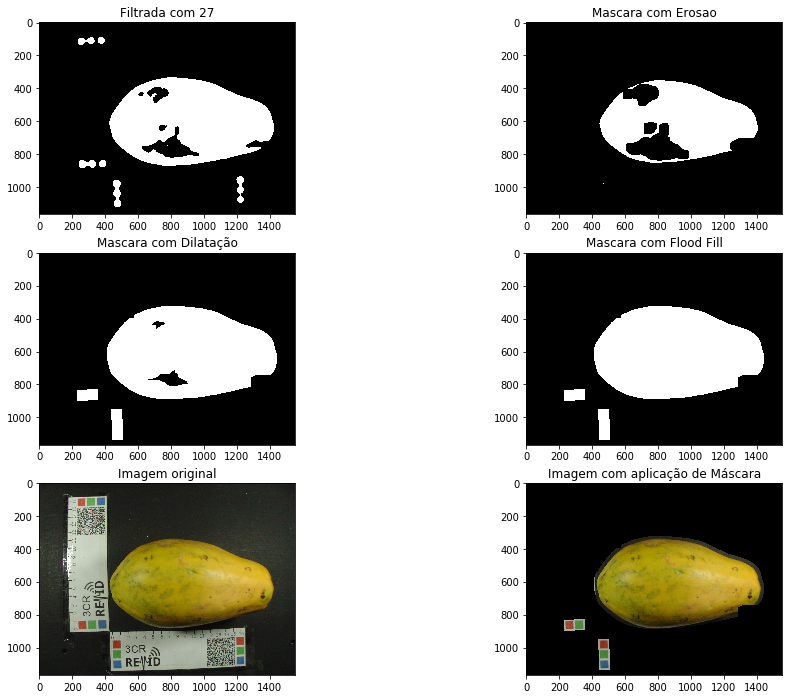

In [131]:
canal_S_lim_blur =cv2.medianBlur(canal_S_lim, 31)

element = cv2.getStructuringElement(cv2.MORPH_RECT, (17,17))


fig = plt.figure(figsize=(16, 12))

#Imagem Filtrada
a = fig.add_subplot(3, 2, 1)
imgplot = plt.imshow(canal_S_lim_blur,cmap="gray")
a.set_title('Filtrada com 27')

#Imagem com aplicação de erosão, iterando duas vezes
b = fig.add_subplot(3, 2, 2)
canal_s_mask = cv2.erode(canal_S_lim_blur, element, iterations = 2)
imgplot = plt.imshow(canal_s_mask,cmap="gray")
b.set_title('Mascara com Erosao')

#Imagem com aplicação de dilatação, iterando quatro vezes
b = fig.add_subplot(3, 2, 3)
canal_s_mask = cv2.dilate(canal_s_mask, element, iterations = 4)
imgplot = plt.imshow(canal_s_mask,cmap="gray")
b.set_title('Mascara com Dilatação')

#criando uma "imagem" para o flood fill, algoritmo para "tapar buracos"
h, w = canal_s_mask.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
im_floodfill = canal_s_mask.copy()

#Aplicando o flood fill
b = fig.add_subplot(3, 2, 4)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
im_floodfill_inv = cv2.bitwise_not(im_floodfill) #bitwise
canal_s_mask = canal_s_mask | im_floodfill_inv

imgplot = plt.imshow(canal_s_mask,cmap="gray")
b.set_title('Mascara com Flood Fill')



b = fig.add_subplot(3, 2, 5)
plt.imshow(image_ori)
b.set_title('Imagem original')

b = fig.add_subplot(3, 2, 6)
final = cv2.bitwise_and(image_ori,image_ori,mask=canal_s_mask)
imgplot = plt.imshow(final,cmap="gray")
b.set_title('Imagem com aplicação de Máscara')

## Exemplo de Filtro 41x41 com Máscara

Text(0.5, 1.0, 'Imagem com aplicação de Máscara')

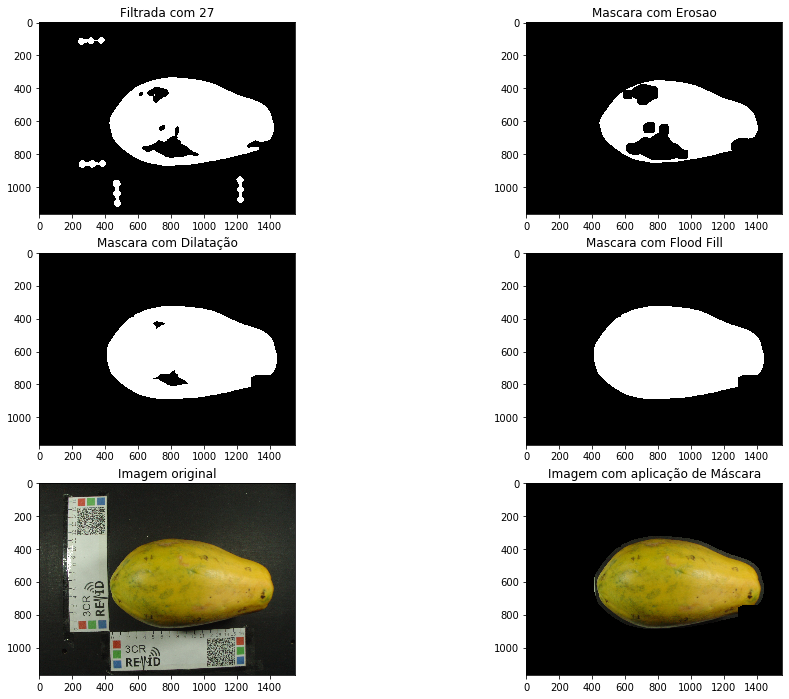

In [136]:
canal_S_lim_blur =cv2.medianBlur(canal_S_lim, 41)

element = cv2.getStructuringElement(cv2.MORPH_RECT, (17,17))


fig = plt.figure(figsize=(16, 12))

#Imagem Filtrada
a = fig.add_subplot(3, 2, 1)
imgplot = plt.imshow(canal_S_lim_blur,cmap="gray")
a.set_title('Filtrada com 27')

#Imagem com aplicação de erosão, iterando duas vezes
b = fig.add_subplot(3, 2, 2)
canal_s_mask = cv2.erode(canal_S_lim_blur, element, iterations = 2)
imgplot = plt.imshow(canal_s_mask,cmap="gray")
b.set_title('Mascara com Erosao')

#Imagem com aplicação de dilatação, iterando quatro vezes
b = fig.add_subplot(3, 2, 3)
canal_s_mask = cv2.dilate(canal_s_mask, element, iterations = 4)
imgplot = plt.imshow(canal_s_mask,cmap="gray")
b.set_title('Mascara com Dilatação')

#criando uma "imagem" para o flood fill, algoritmo para "tapar buracos"
h, w = canal_s_mask.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
im_floodfill = canal_s_mask.copy()

#Aplicando o flood fill
b = fig.add_subplot(3, 2, 4)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
im_floodfill_inv = cv2.bitwise_not(im_floodfill) #bitwise
canal_s_mask = canal_s_mask | im_floodfill_inv

imgplot = plt.imshow(canal_s_mask,cmap="gray")
b.set_title('Mascara com Flood Fill')



b = fig.add_subplot(3, 2, 5)
plt.imshow(image_ori)
b.set_title('Imagem original')

b = fig.add_subplot(3, 2, 6)
final = cv2.bitwise_and(image_ori,image_ori,mask=canal_s_mask)
imgplot = plt.imshow(final,cmap="gray")
b.set_title('Imagem com aplicação de Máscara')

<p><b>Visualizando os plots acima, o filtro adequado é (41x41), pois com filtro abaixos destes, na imagem final é possível ver os parâmetros de medidas .</b></p>

## Algoritmo de Segmentação

In [226]:
def escala(percentual, image):
    escala = 60 # percentual da imagem original
    comprimento = int(image.shape[1] * escala / 100)
    altura = int(image.shape[0] * escala / 100)
    dim = (comprimento, altura)
    return cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

In [227]:
def tratamento_em_2_3(imagem_ori):
    imagem_ori_new = escala(60, imagem_ori)
    imagem = imagem_ori_new
    imagem = cv2.cvtColor(imagem, cv2.COLOR_RGB2HSV)
    canal_S = imagem[:,:,1]
    canal_S_lim = imF.limiarizacao_janela(canal_S, 140,260) 
    canal_S_lim_blur =cv2.medianBlur(canal_S_lim, 39)
    
    # Criando uma máscara para operação morfológica
    element = cv2.getStructuringElement(cv2.MORPH_RECT, (17,17))
    canal_s_mask = cv2.erode(canal_S_lim_blur, element, iterations = 2)
    canal_s_mask = cv2.dilate(canal_s_mask, element, iterations = 4)
    
    h, w = canal_s_mask.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)
    im_floodfill = canal_s_mask.copy()
    
    # Aplicando o flood fill
    cv2.floodFill(im_floodfill, mask, (0,0), 255);
    im_floodfill_inv = cv2.bitwise_not(im_floodfill) #bitwise
    canal_s_mask = canal_s_mask | im_floodfill_inv
    final = cv2.bitwise_and(imagem_ori_new,imagem_ori_new,mask=canal_s_mask)
    
    return final

In [254]:
def tratamento_em_1(imagem_ori):
    imagem_ori = escala(60, imagem_ori)
    imagem = imagem_ori
    imagem = cv2.cvtColor(imagem, cv2.COLOR_RGB2HSV)
    canal_S = imagem[:,:,1]
    canal_S_lim = imF.limiarizacao_janela(canal_S, 110,250) 
    canal_S_lim_blur =cv2.medianBlur(canal_S_lim, 39)
    
    #Criando uma máscara para operação morfológica
    element = cv2.getStructuringElement(cv2.MORPH_RECT, (17,17))
    canal_s_mask = cv2.erode(canal_S_lim_blur, element, iterations = 2)
    canal_s_mask = cv2.dilate(canal_s_mask, element, iterations = 4)
    
    h, w = canal_s_mask.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)
    im_floodfill = canal_s_mask.copy()
    
    #Aplicando o flood fill
    cv2.floodFill(im_floodfill, mask, (0,0), 255);
    im_floodfill_inv = cv2.bitwise_not(im_floodfill) #bitwise
    canal_s_mask = canal_s_mask | im_floodfill_inv
    final = cv2.bitwise_and(imagem_ori,imagem_ori,mask=canal_s_mask)
    
    return final

In [258]:
input_folder = 'mamaocompleto'
save_folder = 'mamaocompleto_tratados'
os.mkdir(save_folder)
files = [os.path.join(input_folder, f) for f in os.listdir(input_folder)]
print(files)
dataset = pandas.DataFrame()
for index,arquivo in enumerate(files):
    nome_arquivo_completo = os.path.basename(arquivo)
    imagem = mpimg.imread(input_folder + '/' +nome_arquivo_completo)
    if (re.search('EM2',nome_arquivo_completo)) or (re.search('EM3',nome_arquivo_completo)):
        img = tratamento_em_2_3(imagem)
        cv2.imwrite(save_folder + '/' +nome_arquivo_completo,cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    elif (re.search('EM1',nome_arquivo_completo)):
        img = tratamento_em_1(imagem)
        cv2.imwrite(save_folder + '/' +nome_arquivo_completo,cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

["mamaocompleto\\EM1_D1'_L1.JPG", "mamaocompleto\\EM1_D1'_L2.JPG", 'mamaocompleto\\EM1_D1_L1.JPG', 'mamaocompleto\\EM1_D1_L2.JPG', 'mamaocompleto\\EM1_D2_L1.JPG', 'mamaocompleto\\EM1_D2_L2.JPG', 'mamaocompleto\\EM1_D4_L1.JPG', 'mamaocompleto\\EM1_D5_L2.JPG', 'mamaocompleto\\EM2_D5_L1.JPG', 'mamaocompleto\\EM2_D5_L2.JPG', "mamaocompleto\\EM2_D6'_L1.JPG", "mamaocompleto\\EM2_D6'_L2.JPG", 'mamaocompleto\\EM2_D6_L1.JPG', 'mamaocompleto\\EM2_D6_L2.JPG', 'mamaocompleto\\EM2_D7_L1.JPG', 'mamaocompleto\\EM2_D8_L1.JPG', 'mamaocompleto\\EM3_D1_L1.JPG', 'mamaocompleto\\EM3_D1_L2.JPG', "mamaocompleto\\EM3_D23''_L1.JPG", "mamaocompleto\\EM3_D23''_L2.JPG", "mamaocompleto\\EM3_D23'_L2.JPG", 'mamaocompleto\\EM3_D23_L2.JPG', 'mamaocompleto\\EM3_D3_L1.JPG', 'mamaocompleto\\EM3_D3_L2.JPG']


## Separando as classes em pastas

In [184]:
!pip install shutil

  ERROR: Could not find a version that satisfies the requirement shutil (from versions: none)
ERROR: No matching distribution found for shutil


In [185]:
import shutil

In [259]:
folder = 'mamaocompleto_tratados'
new_folder = 'mamaocompleto_extract_features'
os.mkdir(new_folder)
os.mkdir(new_folder+'/0')
os.mkdir(new_folder+'/1')
os.mkdir(new_folder+'/2')
files = [os.path.join(folder, f) for f in os.listdir(folder)]
for index,arquivo in enumerate(files):
    nome_arquivo_completo = os.path.basename(arquivo)
    if (re.search('EM1',nome_arquivo_completo)):
        shutil.copy((folder+ '/' + nome_arquivo_completo), os.path.join(new_folder + '/0/'))
    if (re.search('EM2',nome_arquivo_completo)):
        shutil.copy((folder+ '/' + nome_arquivo_completo), os.path.join(new_folder + '/1/'))
    if (re.search('EM3',nome_arquivo_completo)):
        shutil.copy((folder+ '/' + nome_arquivo_completo), os.path.join(new_folder + '/2/'))

## Análisando Gráficos no Canal HSV

In [232]:
input_folder = 'mamaocompleto'
files = [os.path.join(input_folder, f) for f in os.listdir(input_folder)]

dataset = pandas.DataFrame()
for index,arquivo in enumerate(files):
    nome_arquivo_completo = os.path.basename(arquivo)
    if(cv2.imread(arquivo) is not None):
        #print (nome_arquivo_completo)
        image =  mpimg.imread(arquivo)
        img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        img_hist_1 = hist(img_hsv[:,:,0].flatten(), 32)
        img_hist_2 = hist(img_hsv[:,:,1].flatten(), 32)
        img_hist_3 = hist(img_hsv[:,:,2].flatten(), 32)
        plt.clf() #para não mostrar o plot
        array_c = concatenate(([arquivo],img_hist_1[0],img_hist_2[0],img_hist_3[0]))
        dataset = dataset.append([array_c], ignore_index=True)

<Figure size 432x288 with 0 Axes>

### Histogramas por imagens

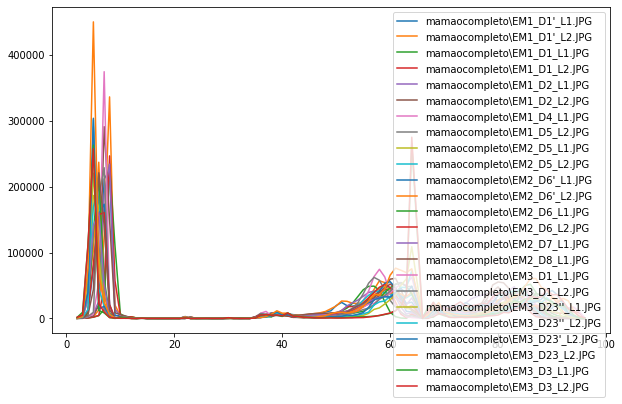

In [233]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
for amostra in dataset.iterrows():
    ax.plot(pandas.to_numeric(amostra[1].drop([0,1,33,65])), label=amostra[1].loc[0])
plt.legend();

### Histogramas por Classe

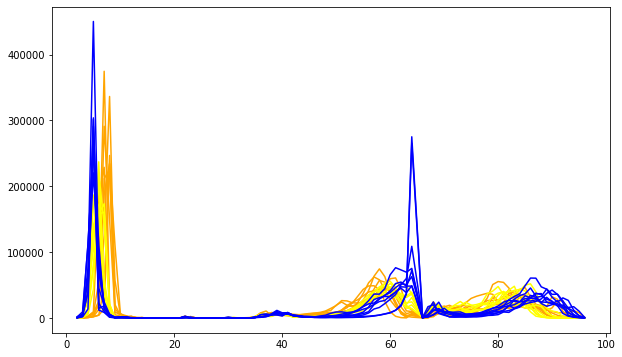

In [234]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
for amostra in dataset.iterrows():
    if re.search('EM1', amostra[1].loc[0]):
        cor = "orange"
    if re.search('EM2', amostra[1].loc[0]):
        cor = "yellow"
    if re.search('EM3', amostra[1].loc[0]):
        cor = "blue"
    ax.plot(pandas.to_numeric(amostra[1].drop([0,1,33,65])), color=cor)

### Histogramas por Classe zoom

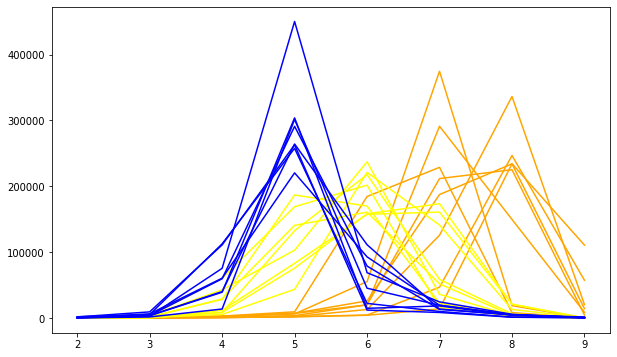

In [235]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
for amostra in dataset.iterrows():
    if re.search('EM1', amostra[1].loc[0]):
        cor = "orange"
    if re.search('EM2', amostra[1].loc[0]):
        cor = "yellow"
    if re.search('EM3', amostra[1].loc[0]):
        cor = "blue"
    ax.plot(pandas.to_numeric(amostra[1][2:10]),color=cor)

<p><b>Analisando estes gráfico aproximando, podemos diferenciar pela picos altos e baixos nos pontos 5, 6 e 7</b></p>

## Extração de Features 

#### Bibliotecas

In [236]:
import cv2
import imutils
import numpy as np
import os
import glob
import csv
from extractor_gray import extract_gray_features
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import seaborn as sns

## Quem são as características (features)

<b>mean_I:</b> média do canal I (HSI)<br>
<b>std_I:</b> desvio padrão do canal I (HSI)<br>
<b>entropy_I:</b> entropia do canal de intensidade<br>
<b>SNM:</b> Métrica de qualidade de imagem<br>
<b>EME:</b> Métrica de melhoria<br>
<b>hu_sobel[1–7] e hu_canny[1–7]:</b> são métricas de borda.<br>
<b>std_hist_I:</b> desvio padrão do histograma<br>
<b>kurt_hist_I:</b> kurtosis do histograma<br>
<b>skew_hist_I:</b> Skewness do histograma<br>
<b>lbp [0–9]:</b> Textura via LBP<br>
<b>com_entropy:</b> Textura via entropia<br>
<b>com_inertia:</b> Textura via inércia<br>
<b>com_energy:</b> Textura via energia<br>
<b>com_correlation:</b> Textura via correlação<br>
<b>com_homogeniety:</b> Textura via homogeneidade<br>
<b>FFT_energy:</b> Textura via energia no domínio de Fourier<br>
<b>FFT_entropy:</b> Textura via entropia no domínio de Fourier<br>
<b>FFT_intertia:</b>Textura via inércia no domínio de Fourier<br>
<b>FFT_homogeneity:</b>Textura via homogeneidade no domínio de Fourier<br>

## Trabalhando com EM1

In [237]:
# Lendo os datasets
input_folder = 'mamaocompleto_extract_features/0/'
output_file = 'mamaocompleto_extract_features//0/dataset_0.csv'
files = [os.path.join(input_folder, f) for f in os.listdir(input_folder)]

In [238]:
# Nome das features
gray_features_names = ['mean_I','std_I','entropy_I','std_hist_I','kurt_hist_I','skew_hist_I','lbp_0','lbp_1','lbp_2','lbp_3','lbp_4','lbp_5','lbp_6','lbp_7',
                'lbp_8','lbp_9','com_entropy','com_inertia','com_energy','com_correlation','com_homogeniety','FFT_energy','FFT_entropy','FFT_intertia','FFT_homogeneity', 'SNM','EME']

# Concatenando o nome do arquivo e a classe pertencente
features_names = ['Name_file'] + gray_features_names + ['classe']

csv_complete = []
csv_complete.append(features_names)

## Gerando Dataset com as Features

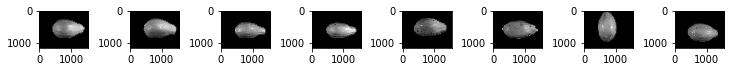

In [239]:

fig = plt.figure(figsize=(16, 8))
aux = 1
for index,arquivo in enumerate(files):
    nome_arquivo_completo = os.path.basename(arquivo)
    #print (nome_arquivo_completo)
    if(cv2.imread(arquivo) is not None):
        img_gray = cv2.imread(arquivo,0)
        linha_csv = [nome_arquivo_completo]
        linha_csv = linha_csv + extract_gray_features(img_gray)
        linha_csv = linha_csv + ["0"]
        csv_complete.append(linha_csv)
        
        #plotando a imagem
        a = fig.add_subplot(10, 10, aux)
        plt.imshow(img_gray,cmap="gray")
        aux = aux + 1

In [240]:
with open(output_file, 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerows(csv_complete)

## Trabalhando com EM2

In [241]:
# Lendo os datasets
input_folder = 'mamaocompleto_extract_features/1'
output_file = 'mamaocompleto_extract_features/1/dataset_1.csv'
files = [os.path.join(input_folder, f) for f in os.listdir(input_folder)]

In [242]:
# Nome das features
gray_features_names = ['mean_I','std_I','entropy_I','std_hist_I','kurt_hist_I','skew_hist_I','lbp_0','lbp_1','lbp_2','lbp_3','lbp_4','lbp_5','lbp_6','lbp_7',
                'lbp_8','lbp_9','com_entropy','com_inertia','com_energy','com_correlation','com_homogeniety','FFT_energy','FFT_entropy','FFT_intertia','FFT_homogeneity', 'SNM','EME']

# Concatenando o nome do arquivo e a classe pertencente
features_names = ['Name_file'] + gray_features_names + ['classe']

csv_complete = []
csv_complete.append(features_names)

## Gerando Dataset com as Features

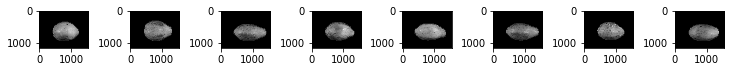

In [243]:

fig = plt.figure(figsize=(16, 8))
aux = 1
for index,arquivo in enumerate(files):
    nome_arquivo_completo = os.path.basename(arquivo)
    #print (nome_arquivo_completo)
    if(cv2.imread(arquivo) is not None):
        img_gray = cv2.imread(arquivo,0)
        linha_csv = [nome_arquivo_completo]
        linha_csv = linha_csv + extract_gray_features(img_gray)
        linha_csv = linha_csv + ["1"] # lembrar de trocar!
        csv_complete.append(linha_csv)
        
        #plotando a imagem
        a = fig.add_subplot(10, 10, aux)
        plt.imshow(img_gray,cmap="gray")
        aux = aux + 1

In [244]:
with open(output_file, 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerows(csv_complete)

## Trabalhando com EM3

In [245]:
# Lendo os datasets
input_folder = 'mamaocompleto_extract_features/2'
output_file = 'mamaocompleto_extract_features/2/dataset_2.csv'
files = [os.path.join(input_folder, f) for f in os.listdir(input_folder)]

In [246]:
# Nome das features
gray_features_names = ['mean_I','std_I','entropy_I','std_hist_I','kurt_hist_I','skew_hist_I','lbp_0','lbp_1','lbp_2','lbp_3','lbp_4','lbp_5','lbp_6','lbp_7',
                'lbp_8','lbp_9','com_entropy','com_inertia','com_energy','com_correlation','com_homogeniety','FFT_energy','FFT_entropy','FFT_intertia','FFT_homogeneity', 'SNM','EME']

# Concatenando o nome do arquivo e a classe pertencente
features_names = ['Name_file'] + gray_features_names + ['classe']

csv_complete = []
csv_complete.append(features_names)

## Gerando Dataset com as Features

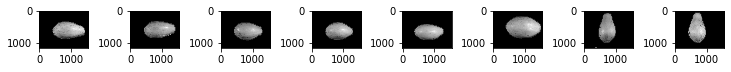

In [247]:
fig = plt.figure(figsize=(16, 8))
aux = 1
for index,arquivo in enumerate(files):
    nome_arquivo_completo = os.path.basename(arquivo)
    #print (nome_arquivo_completo)
    if(cv2.imread(arquivo) is not None):
        img_gray = cv2.imread(arquivo,0)
        linha_csv = [nome_arquivo_completo]
        linha_csv = linha_csv + extract_gray_features(img_gray)
        linha_csv = linha_csv + ["2"] # lembrar de trocar!
        csv_complete.append(linha_csv)
        
        #plotando a imagem
        a = fig.add_subplot(10, 10, aux)
        plt.imshow(img_gray,cmap="gray")
        aux = aux + 1

In [248]:
with open(output_file, 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerows(csv_complete)

### Concatenando os datasets

In [249]:
# Definindo a precisão dos testes
pd.set_option("display.precision", 2)


arquivo_0 = 'mamaocompleto_extract_features/0/dataset_0.csv'
arquivo_1 = 'mamaocompleto_extract_features/1/dataset_1.csv'
arquivo_2 = 'mamaocompleto_extract_features/2/dataset_2.csv'

df_0 = pd.read_csv(arquivo_0, names=['arquivo','mean_I','std_I','entropy_I','std_hist_I','kurt_hist_I','skew_hist_I','lbp_0','lbp_1','lbp_2','lbp_3','lbp_4','lbp_5','lbp_6','lbp_7',
                'lbp_8','lbp_9','com_entropy','com_inertia','com_energy','com_correlation',
                'com_homogeniety','FFT_energy','FFT_entropy','FFT_intertia','FFT_homogeneity', 
                'SNM','EME', 'classe'])

df_1 = pd.read_csv(arquivo_1, names=['arquivo','mean_I','std_I','entropy_I','std_hist_I','kurt_hist_I','skew_hist_I','lbp_0','lbp_1','lbp_2','lbp_3','lbp_4','lbp_5','lbp_6','lbp_7',
                'lbp_8','lbp_9','com_entropy','com_inertia','com_energy','com_correlation',
                'com_homogeniety','FFT_energy','FFT_entropy','FFT_intertia','FFT_homogeneity', 
                'SNM','EME', 'classe']) 

df_2 = pd.read_csv(arquivo_2, names=['arquivo','mean_I','std_I','entropy_I','std_hist_I','kurt_hist_I','skew_hist_I','lbp_0','lbp_1','lbp_2','lbp_3','lbp_4','lbp_5','lbp_6','lbp_7',
                'lbp_8','lbp_9','com_entropy','com_inertia','com_energy','com_correlation',
                'com_homogeniety','FFT_energy','FFT_entropy','FFT_intertia','FFT_homogeneity', 
                'SNM','EME', 'classe']) 



df_3 = df_0[1:].append(df_1[1:]) 

df = df_3[1:].append(df_2[1:]) 

cols = ['mean_I','std_I','entropy_I','std_hist_I','kurt_hist_I','skew_hist_I','lbp_0','lbp_1','lbp_2','lbp_3','lbp_4','lbp_5','lbp_6','lbp_7',
                'lbp_8','lbp_9','com_entropy','com_inertia','com_energy','com_correlation',
                'com_homogeniety','FFT_energy','FFT_entropy','FFT_intertia','FFT_homogeneity', 
                'SNM','EME']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

df.head()

,arquivo,mean_I,std_I,entropy_I,std_hist_I,kurt_hist_I,skew_hist_I,lbp_0,lbp_1,lbp_2,...,com_energy,com_correlation,com_homogeniety,FFT_energy,FFT_entropy,FFT_intertia,FFT_homogeneity,SNM,EME,classe
2,EM1_D1'_L2.JPG,29.45,53.19,2.94,0.04,253.81,15.90,0.02,0.03,0.02,...,0.51,1.0,0.86,0.73,-0.04,-4.06,1.10e-03,2.22e-05,1.34,0
3,EM1_D1_L1.JPG,15.34,32.40,2.15,0.05,253.76,15.89,0.02,0.02,0.01,...,0.62,1.0,0.88,0.86,-0.06,-5.68,1.18e-03,1.64e-06,1.34,0
4,EM1_D1_L2.JPG,18.29,40.10,2.18,0.05,253.88,15.90,0.01,0.02,0.01,...,0.63,1.0,0.89,0.81,-0.05,-4.57,1.13e-03,2.32e-06,1.12,0
5,EM1_D2_L1.JPG,24.65,46.16,2.76,0.05,253.79,15.90,0.02,0.03,0.02,...,0.54,1.0,0.84,0.72,-0.07,-7.12,1.33e-03,3.40e-05,2.18,0
6,EM1_D2_L2.JPG,26.84,48.46,2.74,0.05,253.65,15.89,0.02,0.03,0.02,...,0.53,1.0,0.84,0.93,-0.06,-6.74,1.34e-03,4.10e-05,1.92,0


## Correlações das Variáveis

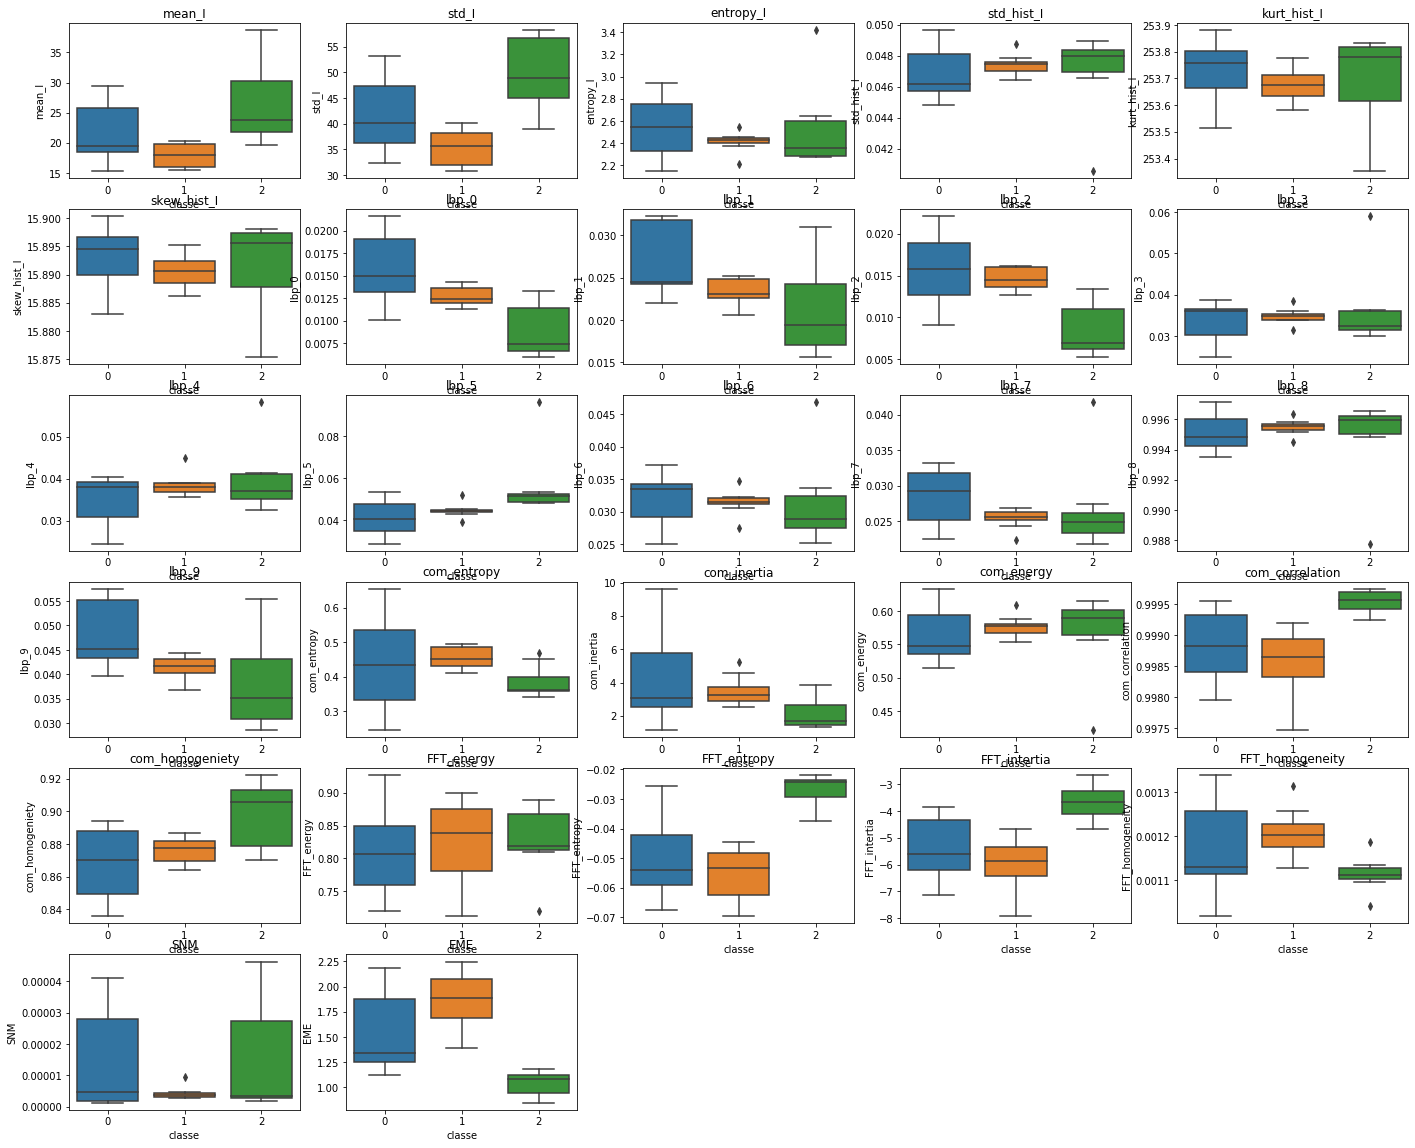

In [250]:
fig = plt.figure(figsize=(24, 20))
aux = 1
for atrib in cols:
    a = fig.add_subplot(6, 5, aux)
    sns.boxplot(data=df, x="classe", y=atrib)
    a.set_title(atrib)
    aux = aux + 1

### Com FFT_Entropy a classe EM3 é destaca das demais no valor acima de -0.038

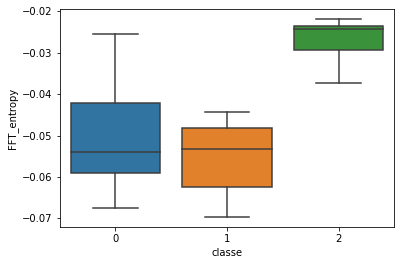

In [251]:
sns.boxplot(data=df, x="classe", y="FFT_entropy")

<p><b>Lógica do Algoritmo<br></b> 
Se  valor da entroy da imagem for maior que -0.038  a imagem é classficada com <b>EM3</b><br>
Senão é verificado as posições 6 e 4 do histograma da imagem em HSV, sendo que posicao 6 for maior que posição 4, é classficada como <b>EM1</b><br>
Caso não se encaixe nessas condições é classificado como <b>EM2</b></p> 
</p>

## Classificação

### Algoritmo de Sigmentação

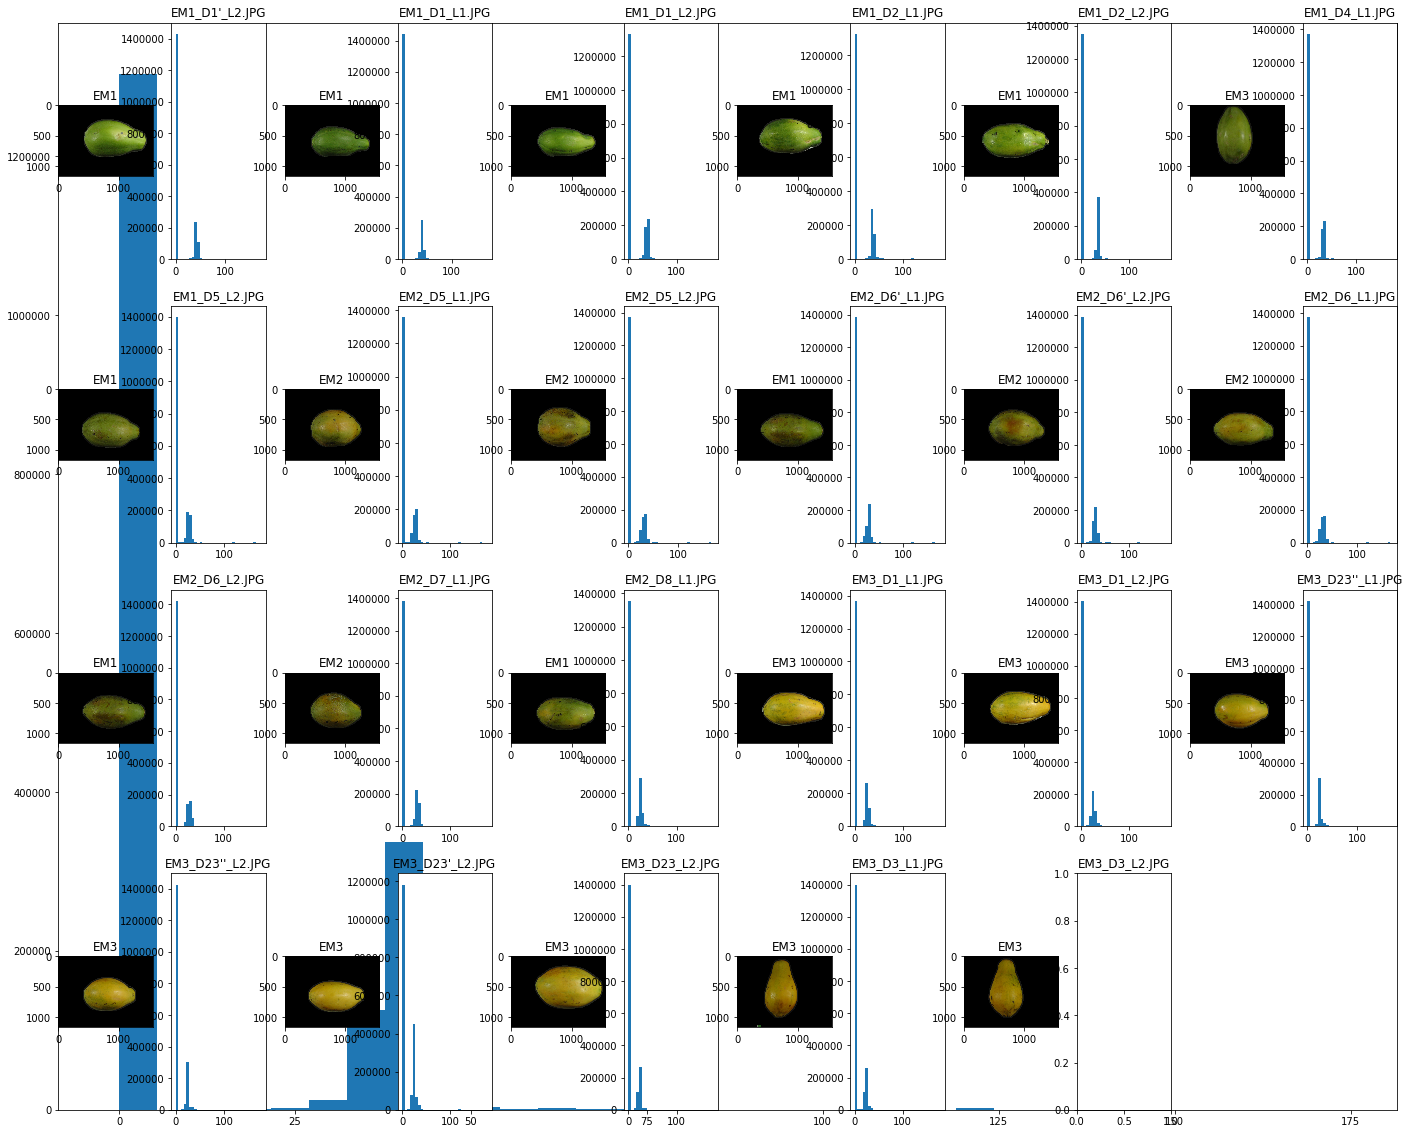

In [252]:
fig = plt.figure(figsize=(24, 20))
aux = 1
for index, sample in df.iterrows():
    im =  mpimg.imread('mamaocompleto/'+sample["arquivo"])
    img_hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
    img_hist_1 = hist(img_hsv[:,:,0].flatten(), 32)
    if sample['FFT_entropy'] > -0.038:
        a = fig.add_subplot(4, 12, aux)
        plt.imshow(im,cmap="gray")
        a.set_title('EM3')
        aux = aux + 1
        
        b = fig.add_subplot(4, 12, aux)
        aux = aux + 1
        b.set_title(sample["arquivo"])
        
    elif(img_hist_1[0][6] > img_hist_1[0][4]):
        a = fig.add_subplot(4, 12, aux)
        plt.imshow(im,cmap="gray")
        a.set_title('EM1')
        aux = aux + 1
        b = fig.add_subplot(4, 12, aux)
        aux = aux + 1
        b.set_title(sample["arquivo"])
        
    else:
        a = fig.add_subplot(4, 12, aux)
        plt.imshow(im,cmap="gray")
        a.set_title('EM2')
        aux = aux + 1
        b = fig.add_subplot(4, 12, aux)
        aux = aux + 1
        b.set_title(sample["arquivo"])
        

## Conclusão

<p><b>Do total de 24 imagens o modelo errou somente 4 imagens, tendo um aproveitamento de 83,33%.</b></p>